In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\ml\modular\ml-class\Data\mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


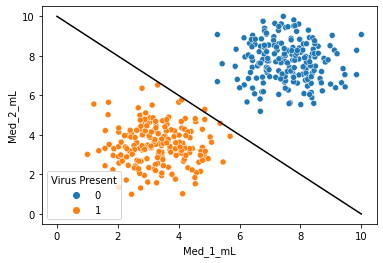

In [15]:
sns.scatterplot(x='Med_1_mL',y="Med_2_mL",data=df,hue="Virus Present")
#creating hyperplane manually
x=np.linspace(0,10,100)
m=-1
b=10
y=m*x+b
plt.plot(x,y,"black")

In [17]:
from sklearn.svm import SVC

In [18]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [22]:
x=df.drop("Virus Present",axis=1)
y=df["Virus Present"]


In [26]:
model=SVC(kernel="poly",C=1000)#C value is high ,so it will allow less misclassification and using kernal as poly
model.fit(x,y)

SVC(C=1000, kernel='poly')

In [27]:
# CODE SOURCE IS DIRECTLY FROM DOCUMENTATION
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


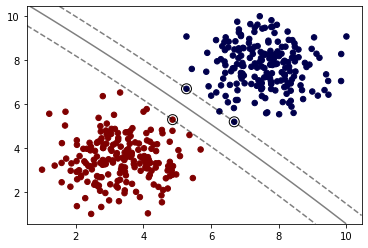

In [28]:
plot_svm_boundary(model, x, y)

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


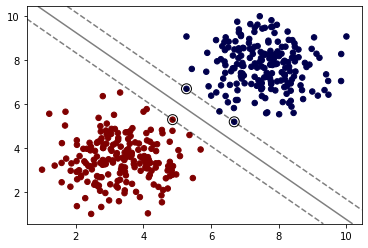

In [29]:
#again
model=SVC(kernel="linear",C=1000)#C value is high ,so it will allow less misclassification and using kernal as linear
model.fit(x,y)
plot_svm_boundary(model, x, y)

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


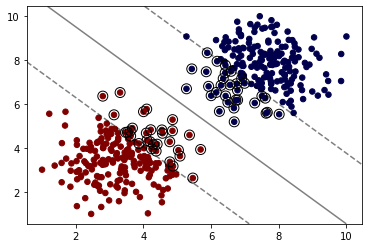

In [31]:
#exploring the hyperparameter in svm
#again
model=SVC(kernel="linear",C=0.005)#C value is low ,so it will allow  misclassification 
model.fit(x,y)
plot_svm_boundary(model, x, y)


c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


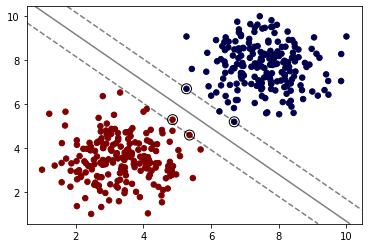

In [33]:
model=SVC(kernel="linear",C=1)
model.fit(x,y)
plot_svm_boundary(model, x, y)

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


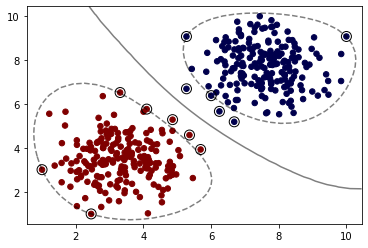

In [35]:
model=SVC(kernel="rbf",C=1)# using kernal "rbf"
model.fit(x,y)
plot_svm_boundary(model, x, y)

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


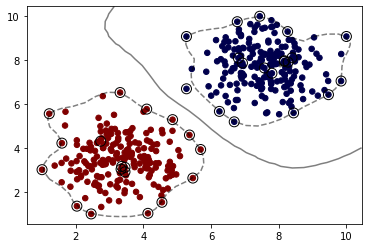

In [36]:
#now gamma value 
model=SVC(kernel="rbf",C=1,gamma="auto")
model.fit(x,y)
plot_svm_boundary(model, x, y)
#overfiting is happening

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


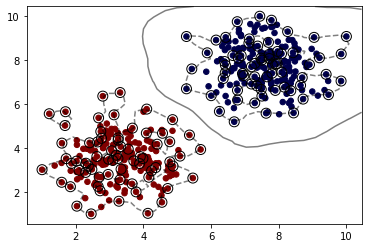

In [37]:
# inceraing gamma value , providing custom value 
model=SVC(kernel="rbf",C=1,gamma=2)
model.fit(x,y)
plot_svm_boundary(model, x, y)

In [38]:
# shows that if you increase the value of gamma it will tend to toward overfitting

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


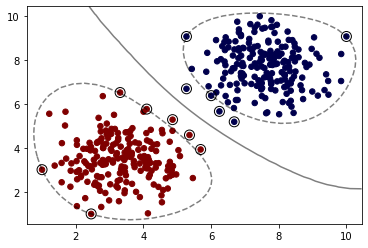

In [40]:
#using gamma = scale
model=SVC(kernel="rbf",C=1,gamma="scale")
model.fit(x,y)
plot_svm_boundary(model, x, y)

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


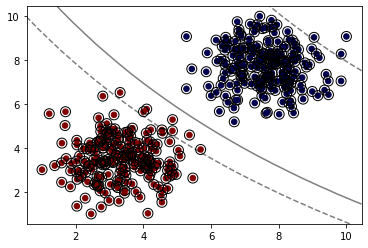

In [41]:
#for kernel="sigmoid"
model=SVC(kernel="sigmoid",C=1,gamma="scale")
model.fit(x,y)
plot_svm_boundary(model, x, y)

c:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


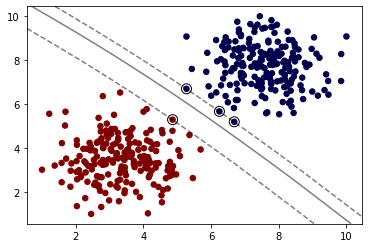

In [45]:
model=SVC(kernel="poly",C=1,degree=9)
model.fit(x,y)
plot_svm_boundary(model, x, y)

In [46]:
# as we are checking these parameters manulally , but by using grid search cv we can select the best parameters

In [47]:
from sklearn.model_selection import GridSearchCV

In [50]:

from sklearn.model_selection import GridSearchCV

svm_model = SVC()

param_grid = {'C': [0.01,0.1, 1], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}

In [51]:
grid_model = GridSearchCV(svm_model, param_grid)

In [53]:
grid_model.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [54]:
grid_model.best_params_

{'C': 0.01, 'kernel': 'linear'}